Experimental Identification of Physically Feasible Dynamic Parameters of the 7-link WAM™ Robot using LMI–SDP Techniques
=======================================================================================================================

[![DOI](https://zenodo.org/badge/920/cdsousa/wam7_dyn_ident.png)](http://dx.doi.org/10.5281/zenodo.10537)

*Experimental code and data associated with the paper:*

**Cristóvão D. Sousa and Rui Cortesão, "Physical feasibility of robot base inertial parameter identification: A linear matrix inequality approach," The International Journal of Robotics Research, vol. 33, no. 6, pp. 931–944, May. 2014, doi: [10.1177/0278364913514870](http://dx.doi.org/10.1177/0278364913514870)**

[Postprint availabe from ResearchGate](http://www.researchgate.net/publication/262483999_Physical_feasibility_of_robot_base_inertial_parameter_identification_A_linear_matrix_inequality_approach)

------------------------


Authors
-------

- Cristóvão D. Sousa, [crisjss@gmail.com](mailto:crisjss@gmail.com)
- Rui Cortesão, [cortesao@isr.uc.pt](mailto:cortesao@isr.uc.pt)

------------------------


Research Notebook
-----------------

The research is done in [Python](http://www.python.org/) within an [IPython notebook](http://ipython.org/notebook.html) (the *WAM7 Dynamic Parameter Identification.ipynb* file).
Data is in *data* folder. Additional Python support code is in *support_funcs* folder.

The file *WAM7 Dynamic Parameter Identification.html* is a **preview** of the notebook. **It can be seen online at:**

**[Experimental WAM Robot Dynamic Identification with LMI](http://goo.gl/dOPj8j)**



How to run the code
-------------------

- clone the git repository (it contains code and data) from https://github.com/cdsousa/wam7_dyn_ident
- open the *WAM7 Dynamic Parameter Identification.ipynb* notebook with [IPython](http://ipython.org/)
- edit and run the code

Dependencies:

- [Python](http://www.python.org/)
- [IPython](http://ipython.org/)
- [SymPy](http://sympy.org/)
- [Numpy](http://www.numpy.org/)
- [SciPy](http://www.scipy.org/)
- [SymPyBotics](https://github.com/cdsousa/SymPyBotics)
- [PyLMI-SDP](https://github.com/cdsousa/PyLMI-SDP)

------------------------


Questions & Feedback
--------------------

Feel free to contact the authors at [crisjss@gmail.com](mailto:crisjss@gmail.com)

------------------------


License
-------

Copyright (c) 2013, Cristóvão Duarte Sousa, Rui Cortesão

All rights reserved.

[![Creative Commons License](http://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)](http://creativecommons.org/licenses/by-nc-sa/4.0/)
This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/)


---------------

---------------

---------------

---------------

# Initializations

In [1]:
datafolder = 'data/'
tmpfolder = 'tmp/'

In [8]:
from sympy import init_printing
init_printing()

%pylab inline

Populating the interactive namespace from numpy and matplotlib


1 - Robot Model
===============

In [2]:
import sympybotics

#### Robot Definition

In [4]:
rbtdef = sympybotics.RobotDef("WAM Arm 7 DOF",
            [("-pi/2", 0, 0, "q"),
             ("pi/2", 0, 0, "q"),
             ("-pi/2", 0.045, 0.55, "q"),
             ("pi/2", -0.045, 0, "q"),
             ("-pi/2", 0, 0.3, "q"),
             ("pi/2", 0, 0, "q"),
             (0, 0, 0.06, "q")],
            dh_convention="standard")

rbtdef.frictionmodel = {'Coulomb', 'viscous', 'offset'}
rbtdef.driveinertiamodel = 'simplified'

#### Model Generation

In [7]:
%time rbt = sympybotics.RobotDynCode(rbtdef)
%time rbt.calc_base_parms()

Wall time: 12.9 s
Wall time: 7.1 s


In [13]:
import pickle
with open(tmpfolder + 'robotmodels/wam7_model.pkl', 'wb') as file:
    pickle.dump( rbt, file )

## Base Dynamic Parameters

In [3]:
import pickle
with open(tmpfolder +  'robotmodels/wam7_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [12]:
rbt.dyn.n_dynparms, rbt.dyn.n_base

(98, 69)

In [13]:
print(rbt.dyn.baseparms.n())

Matrix([[Ia_1 + L_1yy + L_2zz], [fv_1], [fc_1], [fo_1], [L_2xx - L_2zz + L_3zz - 1.1*l_3y + 0.300475*m_3 + 0.300475*m_4 + 0.300475*m_5 + 0.300475*m_6 + 0.300475*m_7], [L_2xy], [L_2xz], [Ia_2 + L_2yy + L_3zz - 1.1*l_3y + 0.300475*m_3 + 0.300475*m_4 + 0.300475*m_5 + 0.300475*m_6 + 0.300475*m_7], [L_2yz], [l_2x], [l_2z - l_3y + 0.55*m_3 + 0.55*m_4 + 0.55*m_5 + 0.55*m_6 + 0.55*m_7], [fv_2], [fc_2], [fo_2], [L_3xx - L_3zz + L_4zz + 0.002025*m_3], [L_3xy - 0.045*l_3y], [L_3xz], [L_3yy + L_4zz - 0.002025*m_3 - 0.00405*m_4 - 0.00405*m_5 - 0.00405*m_6 - 0.00405*m_7], [L_3yz], [l_3x + 0.045*m_3 + 0.045*m_4 + 0.045*m_5 + 0.045*m_6 + 0.045*m_7], [l_3z + l_4y], [Ia_3], [fv_3], [fc_3], [fo_3], [L_4xx - L_4zz + L_5zz - 0.6*l_5y + 0.002025*m_4 + 0.092025*m_5 + 0.092025*m_6 + 0.092025*m_7], [L_4xy + 0.045*l_4y], [L_4xz], [L_4yy + L_5zz - 0.6*l_5y - 0.002025*m_4 + 0.087975*m_5 + 0.087975*m_6 + 0.087975*m_7], [L_4yz], [l_4x - 0.045*m_4 - 0.045*m_5 - 0.045*m_6 - 0.045*m_7], [l_4z - l_5y + 0.3*m_5 + 0.3*m_

2 - Trajectories and Recorded Data
==================================

In [52]:
import pickle
import sympybotics
import numpy

In [53]:
with open(tmpfolder +  'robotmodels/wam7_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

### Plots

In [276]:
parms_traj = 'traj1'

with open(datafolder +  'trajectories/%s_shwfl_abq0.pkl'%parms_traj, 'rb' ) as file:
          s_h_wf_l, a_b_q0 = pickle.load(file)

In [277]:
h = 0.001
decimate = 10
h_plot = h*decimate

with open(datafolder +  'trajectories/%s.dat'%parms_traj, 'r' ) as file:
          q_ref_orig = numpy.loadtxt(file)
s = q_ref_orig.shape[0] / decimate

q_ref = numpy.zeros((s, rbt.dof))
for i in range(s):
    q_ref[i, :] = q_ref_orig[i*decimate, :]

In [278]:
si = 1/h_plot
sf = si + 20/h_plot
t = numpy.arange(sf-si) * h_plot

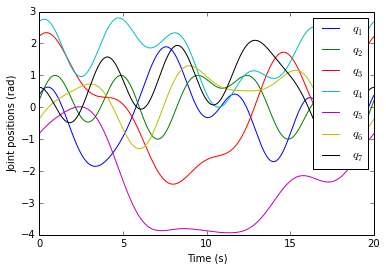

In [279]:
from matplotlib import pyplot as plt
plt.close()

for i in range(rbt.dof):
    plt.plot(t,q_ref[si:sf,i], label="$q_%d$"%(i+1))
plt.legend()

plt.xlabel("Time (s)")
plt.ylabel("Joint positions (rad)")

plt.show()

3 - Regression Data Processing
==============================

In [14]:
import os
import pickle
import math
import sympy
import numpy
import sympybotics

In [1]:
with open(tmpfolder +  'robotmodels/wam7_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

NameError: name 'tmpfolder' is not defined

### Data Load

In [15]:
parms_traj = 'traj1'

In [282]:
from support_funcs.regr_data_proc import read_data
t_raw, q_raw, tau_raw, t_ref, q_ref = read_data( rbt.dof, 0.001,
                                                datafolder + 'recdata/rbtlog_%s.dat'%parms_traj,
                                                datafolder + 'trajectories/traj1.dat')

### Some Plots

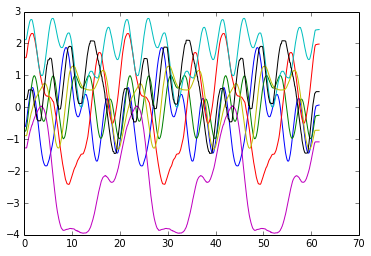

In [283]:
from matplotlib import pyplot as plt
plt.close()

for i in range(q_raw.shape[1]):
    plt.plot(t_raw,q_raw[:,i])

plt.show()

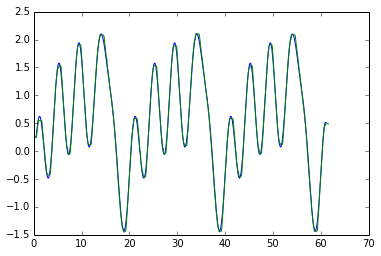

In [284]:
from matplotlib import pyplot as plt
plt.close()

joint = 7
plt.plot(t_ref+0.20,q_ref[:,joint-1])
plt.plot(t_raw,q_raw[:,joint-1])

plt.show()

In [11]:
del t_raw, q_raw, tau_raw, t_ref, q_ref

### Parameter Load

In [16]:
with open(datafolder +  'trajectories/%s_shwfl_abq0.pkl'%parms_traj, 'rb' ) as file:
          s_h_wf_l, a_b_q0 = pickle.load(file)

print(dict(zip(('S', 'h', 'wf', 'L'), s_h_wf_l)))
print('\n')

ImportError: No module named multiarray

### Filter Cut-off Frequency Definition

In [14]:
fc_mult = 10

In [15]:
wf = float(s_h_wf_l[2])
L = float(s_h_wf_l[3])
fc = fc_mult * ( wf / (2*math.pi) * L )
fc

2.5

In [16]:
fc_q = fc
fc_dq = fc
fc_ddq = fc

fc_tau = float('Inf')  # fc

si = int(3/0.001)
sf = -int(1/0.001)

### Data Filtering, Differentiation and Regression Data Generation

In [1]:
datafolder = 'data/'
tmpfolder = 'tmp/'
import pickle
import sympybotics
with open(tmpfolder +  'robotmodels/wam7_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )
rec_h = 0.001
import sympybotics as spb
print(spb.robot_code_to_func( 'matlab', rbt.H_code, 'H', 'regressor_func', rbt.rbtdef))

function [H] = regressor_func(q,dq,ddq)
%%
    x0 = -ddq(0);
    x1 = -dq(0);
    x2 = sin(q(1));
    x3 = x1*x2;
    x4 = dq(1)*x3;
    x5 = -x4;
    x6 = cos(q(1));
    x7 = -x6;
    x8 = x1*x7;
    x9 = -x8;
    x10 = dq(1)*x9;
    x11 = x0*x2 + x10;
    x12 = x3*x9;
    x13 = dq(1)^2;
    x14 = x3^2;
    x15 = x0*x7 + x4;
    x16 = x8^2;
    x17 = x3*x8;
    x18 = dq(1)*x8;
    x19 = -9.81*x2;
    x20 = -x19;
    x21 = 9.81*x6;
    x22 = cos(q(2));
    x23 = dq(1)*x22;
    x24 = sin(q(2));
    x25 = x24*x3;
    x26 = -x25;
    x27 = x23 + x26;
    x28 = -dq(2);
    x29 = -x28;
    x30 = ddq(1)*x24;
    x31 = x11*x22;
    x32 = x27*x29 + x30 + x31;
    x33 = dq(1)*x24;
    x34 = x22*x3;
    x35 = x33 + x34;
    x36 = -x35;
    x37 = x28 + x9;
    x38 = x36*x37;
    x39 = -x24;
    x40 = x27*x35;
    x41 = -x40;
    x42 = x27*x37;
    x43 = x32 + x42;
    x44 = -x43;
    x45 = x35^2;
    x46 = x37^2;
    x47 = -x46;
    x48 = x45 + x47;
    x49 = -ddq(2) - x15;
    x50 = x41 + x49;
 

In [22]:
from support_funcs.regr_data_proc import read_data, diff_and_filt_data, gen_regr_matrices

def process_regression_data(traj_name):
    t_raw, q_raw, tau_raw, t_ref, q_ref = read_data(dof=rbt.dof, h=rec_h,
                                                    rbtlogfile=datafolder + 'recdata/rbtlog_%s.dat'%traj_name,
                                                    trajreffile=datafolder + 'trajectories/%s.dat'%traj_name)
    
    q, dq, ddq, tau = diff_and_filt_data(dof=rbt.dof, h=rec_h,  q_raw=q_raw, tau_raw=tau_raw,
                                   fc_q=fc_q, fc_dq=fc_dq, fc_ddq=fc_ddq, fc_tau=fc_tau)
    
    t_raw = t_raw[si:sf]; q_raw = q_raw[si:sf]; tau_raw = tau_raw[si:sf]
    q = q[si:sf]; dq = dq[si:sf]; ddq = ddq[si:sf]; tau = tau[si:sf]
    
    t_raw = t_raw - t_raw[0]
    
    t = numpy.array(range(q.shape[0])) * rec_h
    
    W, omega, Q1, R1, rho1 = gen_regr_matrices(rbt, q, dq, ddq, tau)
    
    return t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1

In [34]:
from support_funcs.utils import _fprint

for traj in ['traj1', 'traj2', 'traj3', 'traj4']:
    _fprint('>>>>>>>> %s proc <<<<<<<<<'%traj)
    %time t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1 = process_regression_data(traj)
    
    _fprint(' (cond=%f)'%numpy.linalg.cond(W))
    
    _fprint('%s save'%traj)
    
    %time \
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_raw', t=t_raw, q=q_raw, tau=tau_raw);\
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_proc', t=t, q=q, dq=dq, ddq=ddq, tau=tau); \
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_regr', W=W, omega=omega, Q1=Q1, R1=R1, rho1=rho1)
    
    del t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1

>>>>>>>> traj1 proc <<<<<<<<<
CPU times: user 1min 26s, sys: 1.17 s, total: 1min 27s
Wall time: 1min 41s
 (cond=99.403409)
traj1 save
CPU times: user 17.2 s, sys: 1.03 s, total: 18.2 s
Wall time: 38.7 s
>>>>>>>> traj2 proc <<<<<<<<<
CPU times: user 1min 27s, sys: 1.05 s, total: 1min 28s
Wall time: 1min 57s
 (cond=93.618890)
traj2 save
CPU times: user 16.6 s, sys: 973 ms, total: 17.6 s
Wall time: 21.1 s
>>>>>>>> traj3 proc <<<<<<<<<
CPU times: user 1min 28s, sys: 840 ms, total: 1min 28s
Wall time: 1min 30s
 (cond=105.647955)
traj3 save
CPU times: user 17.1 s, sys: 867 ms, total: 17.9 s
Wall time: 19 s
>>>>>>>> traj4 proc <<<<<<<<<
CPU times: user 1min 27s, sys: 873 ms, total: 1min 28s
Wall time: 1min 30s
 (cond=101.282987)
traj4 save
CPU times: user 16.2 s, sys: 813 ms, total: 17 s
Wall time: 21.3 s


### Plot

In [285]:
raw = numpy.load(tmpfolder + 'procdata/traj1_raw.npz')
tau_raw = raw['tau']
q_raw = raw['q']
del raw
proc = numpy.load(tmpfolder + 'procdata/traj1_proc.npz')
t = proc['t']
tau = proc['tau']
q = proc['q']
dq = proc['dq']
del proc

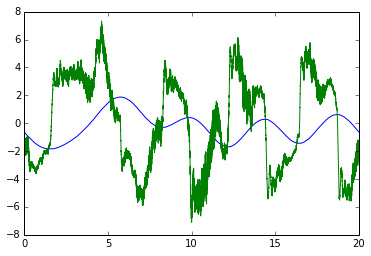

In [286]:
from matplotlib import pyplot as plt
plt.close()

joint = 1
firsts = 20000
plt.plot(t[:firsts],q_raw[:,joint-1][:firsts])
#plt.plot(t[:firsts],q[:,joint-1][:firsts])
#plt.plot(t[:firsts],dq[:,joint-1][:firsts])
plt.plot(t[:firsts],tau_raw[:,joint-1][:firsts])

plt.show()

In [287]:
del t, q, dq, tau, q_raw, tau_raw

4 - Dynamic Parameter Estimation
================================

In [55]:
import os
import pickle
import sympy
import numpy
import time

import sympybotics
import lmi_sdp

from lmi_sdp import init_lmi_latex_printing
init_lmi_latex_printing()

In [56]:
with open(tmpfolder +  'robotmodels/wam7_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [85]:
epsilon_safemargin = 1e-6
epsilon_sdptol = 1e-7

## LMI Matrix Definitions

In [57]:
dof = rbt.dof

delta = rbt.dyn.dynparms
n_delta = rbt.dyn.n_dynparms

beta = rbt.dyn.baseparms.n()
n_beta = rbt.dyn.n_base
beta_symbs = sympy.Matrix([sympy.Symbol('beta'+str(i+1),real=True) for i in range(n_beta)])

delta_d = (rbt.dyn.Pd.T*delta)
n_delta_d = len(delta_d)

Pb = rbt.dyn.Pb

varchange_dict = dict(zip(Pb.T*delta ,  beta_symbs - ( beta - Pb.T*delta )))

In [58]:
from support_funcs.utils import skew, mrepl
from sympy import BlockMatrix, Matrix, eye, Identity
I = Identity
S = skew

In [59]:
D_inertia_blocks = []
for i in range(dof):
    L = rbt.rbtdef.L[i]
    l = rbt.rbtdef.l[i]
    m = rbt.rbtdef.m[i]
    Di = BlockMatrix([[L,    S(l).T],
                      [S(l), I(3)*m]])
    D_inertia_blocks.append(Di.as_explicit())

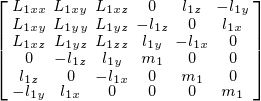

In [288]:
D_inertia_blocks[0]

In [61]:
D_other_blocks = []
for i in range(dof):
    if rbt.rbtdef.driveinertiamodel == 'simplified':
        D_other_blocks.append( Matrix([rbt.rbtdef.Ia[i]]) )
    if 'viscous' in rbt.rbtdef.frictionmodel:
        D_other_blocks.append( Matrix([rbt.rbtdef.fv[i]]) )
    if 'Coulomb' in rbt.rbtdef.frictionmodel:
        D_other_blocks.append( Matrix([rbt.rbtdef.fc[i]]) )

In [62]:
D_blocks = D_inertia_blocks + D_other_blocks

In [289]:
D_blocks

⎡⎡L₁ₓₓ   L_1xy  L_1xz    0    l_1z  -l_1y⎤, ⎡L₂ₓₓ   L_2xy  L_2xz    0    l_2z 
⎢⎢                                       ⎥  ⎢                                 
⎢⎢L_1xy  L_1yy  L_1yz  -l_1z   0     l₁ₓ ⎥  ⎢L_2xy  L_2yy  L_2yz  -l_2z   0   
⎢⎢                                       ⎥  ⎢                                 
⎢⎢L_1xz  L_1yz  L_1zz  l_1y   -l₁ₓ    0  ⎥  ⎢L_2xz  L_2yz  L_2zz  l_2y   -l₂ₓ 
⎢⎢                                       ⎥  ⎢                                 
⎢⎢  0    -l_1z  l_1y    m₁     0      0  ⎥  ⎢  0    -l_2z  l_2y    m₂     0   
⎢⎢                                       ⎥  ⎢                                 
⎢⎢l_1z     0    -l₁ₓ     0     m₁     0  ⎥  ⎢l_2z     0    -l₂ₓ     0     m₂  
⎢⎢                                       ⎥  ⎢                                 
⎣⎣-l_1y   l₁ₓ     0      0     0     m₁  ⎦  ⎣-l_2y   l₂ₓ     0      0     0   

 -l_2y⎤, ⎡L₃ₓₓ   L_3xy  L_3xz    0    l_3z  -l_3y⎤, ⎡L₄ₓₓ   L_4xy  L_4xz    0 
      ⎥  ⎢                                       ⎥ 

## Change of Variable Space

In [83]:
varchange_dict = dict(zip(Pb.T*delta ,  beta_symbs - ( beta - Pb.T*delta )))

In [84]:
DB_blocks = [mrepl(Di, varchange_dict) for Di in D_blocks]

## LMI Definitions

In [86]:
from lmi_sdp import LMI_PD, LMI

In [87]:
DB_LMIs = list(map(LMI_PD, DB_blocks))

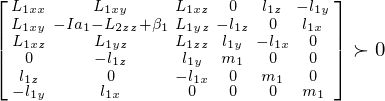

In [290]:
DB_LMIs[0]

In [89]:
DB_LMIs_marg = list(map(lambda lm: LMI(lm, epsilon_safemargin*eye(lm.shape[0])) , DB_blocks))

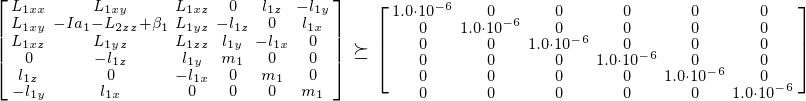

In [291]:
DB_LMIs_marg[0]

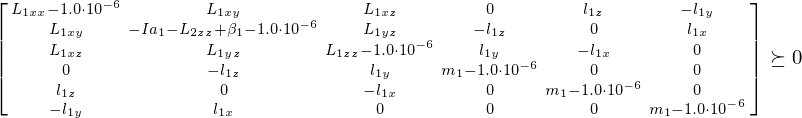

In [292]:
DB_LMIs_marg[0].canonical()

## SDP Solver Interfaces

### [SDPA](http://sdpa.sourceforge.net/)

In [93]:
def sdpa(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !sdpa -ds "$tmpfolder"sdpa_dat/sdp.dat-s -o "$tmpfolder"sdpa_dat/sdpa.out -p "$tmpfolder"sdpa_dat/param.sdpa -pt 2
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/sdpa.out
    sol = [float(v) for v in outfile[outfile.index('xVec = ') + 1].replace('{', '').replace('}', '').split(',')]
    return numpy.matrix(sol).T

### [CSDP](https://projects.coin-or.org/Csdp/)

In [77]:
def csdp(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !cd "$tmpfolder"sdpa_dat; csdp sdp.dat-s csdp.out
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/csdp.out
    sol = [float(v) for v in outfile[0].split()]
    return numpy.matrix(sol).T

### [DSDP5](doi.org/10.1145/1356052.1356057)

In [78]:
def dsdp5(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !cd "$tmpfolder"sdpa_dat; dsdp5 sdp.dat-s -save dsdp5.out -gaptol $epsilon_sdptol
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/dsdp5.out
    sol = [float(v) for v in outfile[0].split()]
    return numpy.matrix(sol).T

### [DSDP5 through CVXOPT](http://abel.ee.ucla.edu/cvxopt/userguide/coneprog.html#cvxopt.solvers.sdp)

In [142]:
def cvxopt_dsdp5(objf, lmis, variables):
    import cvxopt.solvers
    c, Gs, hs = lmi_sdp.to_cvxopt(objf, lmis, variables)
    cvxopt.solvers.options['DSDP_GapTolerance'] = epsilon_sdptol
    tic = time.time()
    sdpout = cvxopt.solvers.sdp(c, Gs=Gs, hs=hs, solver='dsdp')
    toc = time.time()
    print(sdpout['status'], ('ATT!: \'optimal\' does not necessarlly means feasible'))
    print('Elapsed time: %.2f s'%(toc-tic))
    return numpy.matrix(sdpout['x'])

### [CVXOPT CONELP](http://abel.ee.ucla.edu/cvxopt/userguide/coneprog.html#cvxopt.solvers.sdp)

In [143]:
def cvxopt_conelp(objf, lmis, variables):
    import cvxopt.solvers
    c, Gs, hs = lmi_sdp.to_cvxopt(objf, lmis, variables)
    cvxopt.solvers.options['feastol'] = epsilon_sdptol
    tic = time.time()
    sdpout = cvxopt.solvers.sdp(c, Gs=Gs, hs=hs)
    toc = time.time()
    print(sdpout['status'])
    print('Elapsed time: %.2f s'%(toc-tic))
    return numpy.matrix(sdpout['x'])

### [Raw SDPA file](http://plato.asu.edu/ftp/sdpa_format.txt)

Can be solved online with a *Semidefinite Programming* solver at [NEOS Solvers](http://www.neos-server.org/neos/solvers/index.html)

In [156]:
def sdpa_file(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdpa_input.dat-s', 'w') as f:
        f.write(sdpadat)
        
    print("SDPA file saved at: %ssdpa_dat/sdpa_input.dat-s"%tmpfolder)

--------------

Setting the default SDP solver:

In [153]:
solve_sdp = dsdp5

## OLS Regression ($\hat{\beta}$)

In [122]:
indentification_traj = 'traj1'

In [97]:
regr_mats = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_regr.npz')
W = numpy.matrix(regr_mats['W'])
omega = numpy.matrix(regr_mats['omega'])
R1 = numpy.matrix(regr_mats['R1'])
rho1 = numpy.matrix(regr_mats['rho1'])

In [125]:
omega.shape[0] / rbt.dof

57656

In [126]:
W.shape

(403592, 69)

In [127]:
numpy.linalg.cond(W)

99.403409432329326

In [130]:
%time beta_ols = (R1.T * R1).I * R1.T * rho1

CPU times: user 3.33 ms, sys: 0 ns, total: 3.33 ms
Wall time: 2.98 ms


In [131]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_ols.dat', beta_ols)

In [132]:
rho2_norm_sqr = numpy.linalg.norm(omega - W * beta_ols)**2

### Base Parameter Feasibility Test (BPFT) of OLS Solution

In [106]:
dict_subs = dict(zip(beta_symbs, beta_ols))
lmis_ols_bpft = [ lmi_sdp.LMI_PD(mrepl(lmi.canonical().gts, dict_subs)) for lmi in DB_LMIs ]

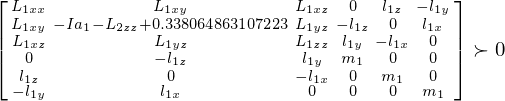

In [293]:
lmis_ols_bpft[0]

In [146]:
variables_ols_bpft = list(delta_d)
objf_ols_bpft = 0  # no objective function - "find" problem

Testing with all solvers

**Just one of the following calls is sufficient to show feasibility/infeasibility**

In [314]:
sol = sdpa_file(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft) # One can solve the output file at http://www.neos-server.org/neos/solvers/sdp:DSDP/SDPA.html for example.

SDPA file saved at: tmp/sdpa_dat/sdpa_input.dat-s


In [133]:
sol = dsdp5(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 29 
Matrix Blocks: 28, Total Number of Constraints: 63 
Nonzeros in Constraints: 225

Read Data File into Buffer:      1.577e-03 seconds
DSDP Set Data:                   1.400e-04 seconds
DSDP Process Data:               9.730e-04 seconds

Data Norms: C: 6.29e+00, A: 1.11e+01, b: 0.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 10

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -2.92832115e+12   1.0e+00   2.9e+04   2.9e+12  0.00  0.00   0.00 
10    1.71998746e+10   -2.50353072e+08   9.6e+01   2.5e+00   5.2e+06  1.00  1.00  29.59 
20   -3.13175640e+06   -3.13559113e+06   1.7e+03   3.1e-02   2.6e-01  1.00  1.00  777.35 
30   -3.13553533e+06   -3.13553537e+06   3.9e+02   3.1e-02   6.9e-05  1.00  0.05  11.20 
31   -3.13553536e+06   -3.13553537e+06   3.9e+02   3.1

In [134]:
sol = sdpa(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

SDPA start at [Mon Oct 21 00:31:02 2013]
set   is STABLE_BUT_SLOW
data  is tmp/sdpa_dat/sdp.dat-s : sparse
out   is tmp/sdpa_dat/sdpa.out
NumThreads  is set as 1
Schur computation : DENSE 
   mu      thetaP  thetaD  objP      objD      alphaP  alphaD  beta 
 0 1.0e+08 1.0e+00 1.0e+00 -0.00e+00 -1.22e+05 5.7e-01 6.6e-01 3.00e-01
 1 5.7e+07 4.3e-01 3.4e-01 -0.00e+00 -2.06e+05 6.4e-01 7.1e-01 3.00e-01
 2 2.8e+07 1.6e-01 9.7e-02 -0.00e+00 -2.90e+05 7.0e-01 7.4e-01 3.00e-01
 3 1.2e+07 4.7e-02 2.5e-02 -0.00e+00 -4.02e+05 7.5e-01 7.9e-01 3.00e-01
 4 4.3e+06 1.2e-02 5.4e-03 -0.00e+00 -5.74e+05 7.8e-01 7.9e-01 3.00e-01
 5 1.4e+06 2.6e-03 1.1e-03 -0.00e+00 -8.19e+05 8.0e-01 8.0e-01 3.00e-01
 6 4.3e+05 5.3e-04 2.3e-04 -0.00e+00 -1.13e+06 7.8e-01 8.0e-01 3.00e-01
 7 1.5e+05 1.1e-04 4.5e-05 -0.00e+00 -1.37e+06 7.4e-01 8.0e-01 3.00e-01
 8 6.1e+04 3.0e-05 9.1e-06 -0.00e+00 -1.23e+06 6.7e-01 8.0e-01 3.00e-01
 9 2.8e+04 9.9e-06 1.8e-06 -0.00e+00 -7.79e+05 4.6e-01 8.0e-01 3.00e-01
10 1.5e+04 5.4e-06 3.6

In [135]:
sol = csdp(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

This is a pure dual feasibility problem.
Iter:  0 Ap: 0.00e+00 Pobj: -3.8296290e+03 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 8.96e-01 Pobj: -5.2770492e+03 Ad: 8.16e-01 Dobj:  0.0000000e+00 
Iter:  2 Ap: 6.30e-01 Pobj: -4.7758728e+03 Ad: 6.04e-01 Dobj:  0.0000000e+00 
Iter:  3 Ap: 5.03e-01 Pobj: -4.1867025e+03 Ad: 8.53e-01 Dobj:  0.0000000e+00 
Iter:  4 Ap: 8.74e-01 Pobj: -1.5539887e+03 Ad: 4.75e-01 Dobj:  0.0000000e+00 
Iter:  5 Ap: 3.90e-01 Pobj:  2.5868012e+00 Ad: 2.09e-01 Dobj:  0.0000000e+00 
Iter:  6 Ap: 8.83e-02 Pobj:  2.6946911e+03 Ad: 1.83e-01 Dobj:  0.0000000e+00 
Iter:  7 Ap: 3.62e-03 Pobj:  8.0058280e+03 Ad: 1.06e-02 Dobj:  0.0000000e+00 
Iter:  8 Ap: 1.61e-02 Pobj:  6.0199514e+04 Ad: 1.30e-02 Dobj:  0.0000000e+00 
Iter:  9 Ap: 6.67e-03 Pobj:  2.9195543e+05 Ad: 8.91e-03 Dobj:  0.0000000e+00 
Iter: 10 Ap: 4.86e-03 Pobj:  1.5474164e+06 Ad: 7.36e-03 Dobj:  0.0000000e+00 
Iter: 11 Ap: 7.92e-04 Pobj:  3.2963353e+06 Ad: 1.12e-02 Dobj:  0.0000000e+00 
Iter: 12 Ap: 1.26e-03 P

In [144]:
sol = cvxopt_conelp(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.2158e+01  1e+02  2e+00  7e+00  1e+00
 1:  0.0000e+00 -2.3016e-01  3e+00  2e-01  6e-01  8e-01
 2:  0.0000e+00 -9.6107e-02  1e+00  6e-02  2e-01  3e-01
 3:  0.0000e+00  2.0962e-01  4e+01  3e-01  1e+00  2e+00
 4:  0.0000e+00  7.3312e-01  3e+01  1e-01  5e-01  2e+00
 5:  0.0000e+00  4.7892e-01  2e+01  7e-02  3e-01  1e+00
 6:  0.0000e+00  3.4714e+00  1e+02  6e-02  2e-01  4e+00
 7:  0.0000e+00  1.1664e+01  3e+02  6e-02  2e-01  1e+01
 8:  0.0000e+00  1.0313e+02  2e+03  5e-02  2e-01  1e+02
 9:  0.0000e+00  1.7208e+03  4e+04  5e-02  2e-01  2e+03
10:  0.0000e+00  1.3030e+04  3e+05  5e-02  2e-01  1e+04
11:  0.0000e+00  9.8979e+04  2e+06  5e-02  2e-01  1e+05
12:  0.0000e+00  3.6891e+05  8e+06  5e-02  2e-01  4e+05
13:  0.0000e+00  9.4734e+05  2e+07  5e-02  2e-01  9e+05
14:  0.0000e+00  1.0511e+06  3e+07  5e-02  2e-01  1e+06
15:  0.0000e+00  1.0467e+07  3e+08  5e-02  2e-01  1e+07
Certificate of primal infeasibility found.
primal 

## Base Parameter Feasibility Correction (BPFC)     ($\beta^\prime$)

In [155]:
u = sympy.Symbol('u')
U_beta = BlockMatrix([[Matrix([u]),            (beta_ols - beta_symbs).T],
                 [beta_ols - beta_symbs,                 I(n_beta)]])
U_beta = U_beta.as_explicit()

In [148]:
lmis_ols_bpfc = [LMI(U_beta)] + DB_LMIs_marg

In [151]:
lmis_ols_bpfc[1]

Matrix([
[L_1xx,                 L_1xy, L_1xz,     0,  l_1z, -l_1y],
[L_1xy, -Ia_1 - L_2zz + beta1, L_1yz, -l_1z,     0,  l_1x],
[L_1xz,                 L_1yz, L_1zz,  l_1y, -l_1x,     0],
[    0,                 -l_1z,  l_1y,   m_1,     0,     0],
[ l_1z,                     0, -l_1x,     0,   m_1,     0],
[-l_1y,                  l_1x,     0,     0,     0,   m_1]]) >= Matrix([
[1.0e-6,      0,      0,      0,      0,      0],
[     0, 1.0e-6,      0,      0,      0,      0],
[     0,      0, 1.0e-6,      0,      0,      0],
[     0,      0,      0, 1.0e-6,      0,      0],
[     0,      0,      0,      0, 1.0e-6,      0],
[     0,      0,      0,      0,      0, 1.0e-6]])

In [158]:
variables_ols_bpfc = [u] + list(beta_symbs) + list(delta_d)

In [159]:
objf_ols_bpfc = u

In [160]:
sol_ols_bpfc = solve_sdp(objf_ols_bpfc, lmis_ols_bpfc, variables_ols_bpfc)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 99 
Matrix Blocks: 29, Total Number of Constraints: 133 
Nonzeros in Constraints: 496

Read Data File into Buffer:      2.906e-03 seconds
DSDP Set Data:                   3.750e-04 seconds
DSDP Process Data:               1.300e-02 seconds

Data Norms: C: 1.07e+01, A: 1.95e+01, b: 1.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -5.14384241e+12   2.0e+00   5.1e+04   5.1e+12  0.00  0.00   0.00 
10    8.94838822e+13   -2.05367041e+13   4.0e+05   2.1e+05   1.7e+11  1.00  1.00   4.27 
20    3.96240164e+11   -1.17762893e+11   4.0e+03   1.2e+03   1.2e+09  1.00  1.00   0.87 
30    1.06170401e+10   -3.07067071e+09   1.1e+02   3.1e+01   3.2e+07  1.00  1.00   0.85 
40    3.77063860e+08   -1.30536934e+07   2.3e+00   3.8e

In [161]:
u_prime = sol_ols_bpfc[0,0]
beta_prime = sol_ols_bpfc[1:1+n_beta]
delta_d_prime = sol_ols_bpfc[1+n_beta:]

In [162]:
u_prime

0.0040537274987536539

### Solution Double Check

In [165]:
dict_subs = dict(zip(beta_symbs, beta_prime.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_prime.flatten().tolist()[0])))

test = 'ok'
for i, DBi in enumerate(DB_blocks):
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0:
                print i, v
                test = 'fail'
print(test)

ok


In [166]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_prime.dat', beta_prime)

## Feasible Base Parameter Estimation with Ordinary Least Squares (FBPE-OLS)     ($\beta^\star$)

In [167]:
u = sympy.Symbol('u')
U_rho = BlockMatrix([[Matrix([u - rho2_norm_sqr]), (rho1 - R1*beta_symbs).T],
                     [rho1 - R1*beta_symbs,                       I(n_beta)]])
U_rho = U_rho.as_explicit()

In [168]:
lmis_fbpe_ols = [LMI(U_rho)] + DB_LMIs_marg

In [169]:
variables_fbpe_ols = [u] + list(beta_symbs) + list(delta_d)

In [170]:
objf_fbpe_ols = u

In [172]:
sol_fbpe_ols = solve_sdp(objf_fbpe_ols, lmis_fbpe_ols, variables_fbpe_ols)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 99 
Matrix Blocks: 29, Total Number of Constraints: 133 
Nonzeros in Constraints: 2731

Read Data File into Buffer:      5.281e-03 seconds
DSDP Set Data:                   2.069e-04 seconds
DSDP Process Data:               2.709e-02 seconds

Data Norms: C: 7.85e+04, A: 1.70e+04, b: 1.00e+00
Scale C: 2.16e-01

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -1.95170612e+17   2.0e+00   2.0e+09   2.0e+17  0.00  0.00   0.00 
10    4.79481958e+10   -5.52331104e+09   8.8e+01   5.5e+01   4.5e+07  1.00  1.00   4.50 
20    3.80079020e+07   -1.91235465e+06   4.8e-02   0.0e+00   7.6e+04  0.92  1.00   0.46 
30    2.26577621e+05   -8.69552142e+04   3.7e-04   0.0e+00   5.3e+02  1.00  1.00   1.13 
40   -7.67526149e+04   -7.91085802e+04   6.7e-06   0.0

In [173]:
u_star = sol_fbpe_ols[0,0]
beta_star = numpy.matrix(sol_fbpe_ols[1:1+n_beta])
delta_d_star = numpy.matrix(sol_fbpe_ols[1+n_beta:])

In [198]:
u_star

### Solution Double Check

In [174]:
dict_subs = dict(zip(beta_symbs, beta_star.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_star.flatten().tolist()[0])))

test = 'ok'
for DBi in DB_blocks:
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0:
                print(v)
                test = 'fail'
print(test)

ok


In [175]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_star.dat', beta_star)

## Additional Constraints on Centers-of-Mass    ($\beta^{\star e}$)

In [179]:
link_cuboid_hulls = [
[[ -0.140 , +0.140 ],[ -0.174 , +0.174 ],[ -0.084 , +0.346 ]],
[[ -0.084 , +0.084 ],[ -0.174 , +0.174 ],[ -0.084 , +0.170 ]],
[[ -0.090 , +0.040 ],[ -0.550 , +0.040 ],[ -0.045 , +0.045 ]],
[[ -0.045 , +0.095 ],[ -0.045 , +0.045 ],[ -0.050 , +0.830 ]],
[[ -0.045 , +0.045 ],[ -0.020 , +0.100 ],[ -0.045 , +0.045 ]],
[[ -0.045 , +0.045 ],[ -0.060 , +0.045 ],[ -0.020 , +0.060 ]],
[[ -0.045 , +0.045 ],[ -0.045 , +0.045 ],[ -0.018 , +0.001 ]],
]

robotmaxmass = 27.0

#### LMI Matrix Definition

In [180]:
D_add_blocks = []
for i in range(rbt.dof):
    l = rbt.rbtdef.l[i]
    m = rbt.rbtdef.m[i]
    link_cuboid_hull = link_cuboid_hulls[i]
    for j in range(3):
        D_add_blocks.append( Matrix( [[  l[j] - m*link_cuboid_hull[j][0] ]] ) )
        D_add_blocks.append( Matrix( [[ -l[j] + m*link_cuboid_hull[j][1] ]] ) )

D_add_blocks.append(Matrix([robotmaxmass - sum(rbt.rbtdef.m)]))

#### Variable Change and LMI Definition

In [189]:
DB_add_blocks = [ mrepl(Di, varchange_dict) for Di in D_add_blocks ]

In [190]:
DB_add_LMIs = list(map(LMI_PD, DB_add_blocks))

In [191]:
DB_add_LMIs_marg = list(map(lambda lm: LMI(lm, epsilon_safemargin*eye(lm.shape[0])) , DB_add_blocks))

In [299]:
DB_add_LMIs_marg[0]

In [300]:
DB_add_LMIs_marg[-1]

### Testing $\beta^\star$ solution on new constraints

In [196]:
dict_subs = dict(zip(beta_symbs, beta_star))
lmis_star_bpft_add = [ lmi_sdp.LMI_PD(mrepl(lmi.canonical().gts, dict_subs)) for lmi in DB_add_LMIs_marg ]
variables_star_bpft_add = list(delta_d)
objf_star_bpft_add = delta_d[0]

In [197]:
sol_star_bpft_add = solve_sdp(objf_star_bpft_add, lmis_star_bpft_add, variables_star_bpft_add)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 29 
Matrix Blocks: 43, Total Number of Constraints: 43 
Nonzeros in Constraints: 152

Read Data File into Buffer:      3.550e-04 seconds
DSDP Set Data:                   1.562e-04 seconds
DSDP Process Data:               1.860e-04 seconds

Data Norms: C: 2.72e+01, A: 6.32e+00, b: 1.00e+00
Scale C: 2.35e-01

Potential Parameter: 5.00
Reapply Schur matrix: 10

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -1.52142044e+12   2.0e+00   1.5e+04   1.5e+12  0.00  0.00   0.00 
10    3.45214200e+11   -1.71045848e+10   2.7e+00   1.7e+02   4.0e+08  1.00  1.00  11.56 
20    1.00000036e+07    1.00000000e+07   1.0e+00   0.0e+00   7.2e-03  1.00  0.25   3.81 
21    1.00000007e+07    1.00000000e+07   1.0e+00   0.0e+00   1.4e-03  1.00  1.00   0.37 
DSDP Converged. 
DSDP Dual Unbounded, Primal Infeasible

### Finding new solution

In [198]:
lmis_fbpe_ols_add = [LMI(U_rho)] + DB_LMIs_marg + DB_add_LMIs_marg

In [199]:
variables_fbpe_ols_add = [u] + list(beta_symbs) + list(delta_d)

In [200]:
objf_fbpe_ols_add = u

In [201]:
sol_fbpe_ols_add = solve_sdp(objf_fbpe_ols_add, lmis_fbpe_ols_add, variables_fbpe_ols_add)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 99 
Matrix Blocks: 72, Total Number of Constraints: 176 
Nonzeros in Constraints: 2907

Read Data File into Buffer:      5.550e-03 seconds
DSDP Set Data:                   2.770e-04 seconds
DSDP Process Data:               2.512e-02 seconds

Data Norms: C: 7.85e+04, A: 1.70e+04, b: 1.00e+00
Scale C: 2.16e-01

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -2.20525078e+17   2.0e+00   2.2e+09   2.2e+17  0.00  0.00   0.00 
10    6.42274529e+10   -1.26844261e+10   7.1e+01   1.3e+02   5.4e+07  1.00  1.00  25.19 
20    1.66393991e+07   -7.71143772e+05   8.2e-03   4.8e-04   2.8e+04  1.00  1.00   0.91 
30    7.89224941e+04   -8.39443551e+04   7.6e-05   2.6e-06   2.5e+02  1.00  1.00   0.90 
40   -7.87767914e+04   -7.93188073e+04   2.6e-07   0.0

In [202]:
u_starextra = sol_fbpe_ols_add[0,0]
beta_starextra = numpy.matrix(sol_fbpe_ols_add[1:1+n_beta])
delta_d_starextra = numpy.matrix(sol_fbpe_ols_add[1+n_beta:])

In [203]:
u_starextra

79296.845571512735

### Solution Double Check

In [204]:
dict_subs = dict(zip(beta_symbs, beta_starextra.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_starextra.flatten().tolist()[0])))

test = 'ok'
for DBi in (DB_blocks + DB_add_blocks):
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0: test = 'fail'
print(test)

ok


In [205]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_starextra.dat', beta_starextra)

### Inertia Matrix Definiteness Tests

In [221]:
def test_mass_matrix_psd(beta_solution):
    K = rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T
    A = numpy.matrix(K).astype(float)
    b = numpy.matrix(beta_solution).astype(float)
    x = numpy.linalg.pinv(A) * b
    d_test = x
    
    M_func_def = sympybotics.robotcodegen.robot_code_to_func( 'python', rbt.M_code, 'M', 'M_func', rbt.rbtdef)
    exec(M_func_def, globals())
    global sin, cos
    from math import sin, cos
    
    ntests = 10000
    
    ok = 0
    nok = 0
    for i in range(ntests):
        q_test = numpy.random.rand(rbt.dof)
        M_out = M_func( numpy.array(d_test).flatten().tolist(), q_test)
        M = numpy.matrix(M_out).reshape((rbt.dof,rbt.dof))
        try:
            c = numpy.linalg.cholesky(M)
        except:
            nok += 1
            continue
        ok += 1
        
    print 'ok     %8i  %3i%%'%(ok, 100.0*ok/ntests) 
    print 'not ok %8i  %3i%%'%(nok, 100.0*nok/ntests)
    if nok > 0 :
        print('\nNot PSD -> Not feasible!')
    else:
        print('\nSeems feasible.')

In [222]:
beta_ols = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_ols.dat')).T
test_mass_matrix_psd(beta_ols)

ok         4416   44%
not ok     5584   55%

Not PSD -> Not feasible!


In [223]:
beta_starextra = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_starextra.dat')).T
test_mass_matrix_psd(beta_starextra)

ok        10000  100%
not ok        0    0%

Seems feasible.


5 - Regression Model Validation
====================================================

In [224]:
import numpy as np
import sympybotics
import pickle

from collections import OrderedDict
from support_funcs.utils import ListTable

In [225]:
with open(tmpfolder +  'robotmodels/wam7_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [226]:
def analyse(W, omega, R1, beta):
    from numpy import matrix, mean
    from numpy.linalg import cond, norm
    
    p = dict()
    
    n = W.shape[0]
    
    omega_norm = norm(omega)
    omega_mean = mean(omega)
    
    p['err'] = norm(omega - W * beta)
    p['merr'] = p['err'] / n
    
    p['se'] = p['err']**2
    p['mse'] = p['se']/(n-W.shape[1])
    p['rmse'] = p['mse']**0.5
    
    C = p['mse'] * (R1.T * R1).I
    p['sd'] = np.sqrt(C.diagonal()).T
    p['sd%'] = 100. * p['sd'] / np.abs(beta)
    
    p['relerr'] = p['err']/ omega_norm
    p['relerr%'] = p['relerr']*100.
    
    p['1-r2'] = p['err']**2 / norm(omega - omega_mean)**2
    p['r2'] = 1 - p['1-r2']

    return p
    

In [227]:
trajs = OrderedDict([('id', 'traj1'),
                     ('vA', 'traj2'),
                     ('vB', 'traj3'),
                     ('vC', 'traj4')])


betas = OrderedDict([('beta_ols', 'B^'),
                     ('beta_prime', 'B\''),
                     ('beta_star', 'B*'),
                     ('beta_starextra', 'B*e')])

In [229]:
solutions_beta = {betaname:np.matrix(np.loadtxt(tmpfolder + 'solutions/%s_%s.dat'%(trajs['id'], betaname))).T for betaname in betas}

In [232]:
analysis = dict()

for traj in trajs:
    from numpy.linalg import cond
    
    print(traj)
    
    analysis[traj] = dict()
    
    regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_regr.npz')
    W = np.matrix(regr_mats['W'])
    omega = np.matrix(regr_mats['omega'])
    R1 = np.matrix(regr_mats['R1'])
    
    analysis[traj]['cond'] = cond(W)
    
    analysis[traj]['betas'] = dict()
    
    for betaname in betas:
        beta = solutions_beta[betaname]
        analysis[traj]['betas'][betaname] = analyse(W, omega, R1, beta)
    
    del W, omega, R1

id
vA
vB
vC


In [233]:
prop = lambda x: x['relerr%']
form = '%.2f'

table = ListTable()
table.append([''] + ['cond'] + betas.values())
for (traj, trajname) in zip(trajs, ['identification', 'validation A', 'validation B', 'validation C']):
    row = [traj] + ['%.0f'%analysis[traj]['cond']] + [ form%prop(analysis[traj]['betas'][b]) for b in betas]
    table.append(row)
table

[['', 'cond', 'B^', "B'", 'B*', 'B*e'],
 ['id', '99', '6.60', '6.68', '6.64', '6.65'],
 ['vA', '94', '7.16', '7.14', '7.01', '6.98'],
 ['vB', '106', '8.47', '8.49', '8.44', '8.40'],
 ['vC', '101', '6.81', '6.79', '6.76', '6.74']]

In [234]:
import yaml, sympy
with open(datafolder + 'robotparams/wam7_cad.yml', 'r') as f:
    wam7_cad = yaml.load(f)
delta_cad = sympy.Matrix([wam7_cad.get(str(d), d) for d in rbt.dyn.dynparms])
beta_cad = (rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T) * delta_cad

In [271]:
form = '%.4g'

import sympy

table = ListTable()
header = ['', 'Bcad', 'B^', '% std dev B^', 'B*e']
table.append(header)
for i, b in enumerate(rbt.dyn.baseparms):
    if beta_cad[i].is_Number:
        cad_v = sympy.N(beta_cad[i], 4)
    elif beta_cad[i].is_Symbol:
        cad_v = '---'
    else:
        cad_v = sympy.N(beta_cad[i], 4)
    row = ['%.7s ...'%b if len(str(b)) > 7 else str(b), cad_v]
    row += [form%solutions_beta['beta_ols'][i,0], '%.2g'%analysis['id']['betas']['beta_ols']['sd%'][i,0]]
    row += [form%solutions_beta['beta_starextra'][i,0]]
    table.append(row)
table

[['', 'Bcad', 'B^', '% std dev B^', 'B*e'],
 ['Ia_1 +  ...', Ia_1 + 0.1328, '0.3381', '0.53', '0.3049'],
 ['fv_1', '---', '1.63', '0.28', '1.648'],
 ['fc_1', '---', '1.601', '0.26', '1.605'],
 ['fo_1', '---', '0.01037', '18', '0.007658'],
 ['L_2xx - ...', 1.181, '1.017', '0.29', '1.04'],
 ['L_2xy', 1.347e-5, '-0.0505', '3.2', '-0.05561'],
 ['L_2xz', 0.0001170, '-0.02539', '4.8', '-0.02304'],
 ['Ia_2 +  ...', Ia_2 + 1.189, '1.451', '0.23', '1.446'],
 ['L_2yz', -3.659e-5, '-0.03322', '4.3', '-0.038'],
 ['l_2x', -0.009183, '0.08154', '1.7', '0.08391'],
 ['l_2z -  ...', 2.333, '2.358', '0.027', '2.36'],
 ['fv_2', '---', '2.372', '0.21', '2.364'],
 ['fc_2', '---', '0.533', '0.71', '0.5332'],
 ['fo_2', '---', '0.898', '1.2', '0.9296'],
 ['L_3xx - ...', 0.003856, '-0.01168', '20', '0.0183'],
 ['L_3xy - ...', -2.509e-5, '0.03663', '2.9', '0.02517'],
 ['L_3xz', -5.098e-6, '0.002625', '45', '-0.00827'],
 ['L_3yy + ...', -0.006954, '-0.06614', '2.2', '0.001251'],
 ['L_3yz', 5.295e-6, '-0.04278', '2.5', '-0.03598'],
 ['l_3x +  ...', 0.1476, '0.1194', '0.44', '0.1255'],
 ['l_3z +  ...', -0.0004910, '-0.002107', '18', '-0.0009105'],
 ['Ia_3', '---', '0.1139', '1.3', '0.06988'],
 ['fv_3', '---', '0.8554', '0.52', '0.8111'],
 ['fc_3', '---', '0.3454', '1.1', '0.3718'],
 ['fo_3', '---', '-0.09566', '2.1', '-0.08749'],
 ['L_4xx - ...', 0.1149, '0.165', '0.9', '0.1385'],
 ['L_4xy + ...', -3.944e-5, '0.01292', '5.4', '0.009043'],
 ['L_4xz', -8.193e-5, '-0.02431', '2.4', '-0.01386'],
 ['L_4yy + ...', 0.1057, '0.1213', '1.1', '0.1239'],
 ['L_4yz', 9.417e-5, '-0.01128', '6.2', '-0.005383'],
 ['l_4x -  ...', -0.1235, '-0.1057', '0.35', '-0.101'],
 ['l_4z -  ...', 0.5010, '0.5209', '0.088', '0.5174'],
 ['Ia_4', '---', '-0.005825', '27', '1.009e-06'],
 ['fv_4', '---', '0.6153', '0.8', '0.6005'],
 ['fc_4', '---', '0.6291', '0.57', '0.6417'],
 ['fo_4', '---', '0.05353', '5.4', '0.03402'],
 ['L_5xx - ...', 0.0005648, '-0.008932', '12', '-0.01554'],
 ['L_5xy', -2.564e-7, '0.005089', '7.4', '-0.002231'],
 ['L_5xz', 1.882e-9, '0.0198', '2.4', '0.01646'],
 ['L_5yy + ...', 0.0006530, '0.006071', '11', '0.007886'],
 ['L_5yz', 8.326e-7, '-0.0092', '4.5', '-0.002773'],
 ['l_5x', 1.104e-5, '0.006003', '4.9', '0.006159'],
 ['l_5z +  ...', -0.006580, '-0.01351', '2', '-0.01388'],
 ['Ia_5', '---', '-0.0009694', '81', '1.004e-06'],
 ['fv_5', '---', '0.1457', '3.3', '0.1387'],
 ['fc_5', '---', '0.03597', '7.7', '0.03627'],
 ['fo_5', '---', '0.004681', '43', '0.001217'],
 ['L_6xx - ...', 0.0006155, '0.003965', '20', '0.009329'],
 ['L_6xy', -1.483e-6, '0.001507', '22', '-0.002418'],
 ['L_6xz', 2.005e-6, '-0.01062', '3.4', '-0.003334'],
 ['L_6yy + ...', 0.0007576, '0.01942', '3', '0.01731'],
 ['L_6yz', 0.0002216, '0.00495', '7.2', '0.004267'],
 ['l_6x', -5.125e-5, '-0.007862', '3.2', '-0.006727'],
 ['l_6z +  ...', 0.01421, '0.009031', '2.4', '0.009509'],
 ['Ia_6', '---', '-0.008871', '10', '1.003e-06'],
 ['fv_6', '---', '0.1437', '3.2', '0.1344'],
 ['fc_6', '---', '0.06428', '4.7', '0.07144'],
 ['fo_6', '---', '-0.007354', '26', '-0.007547'],
 ['L_7xx - ...', -3.286e-7, '-0.01584', '3.2', '-0.01357'],
 ['L_7xy', 1.909e-7, '-0.002082', '12', '-0.0009831'],
 ['L_7xz', -1.771e-8, '0.0002248', '61', '6.76e-05'],
 ['L_7yz', 3.623e-8, '0.0002694', '52', '0.0007734'],
 ['L_7zz', 7.408e-5, '-0.0005387', '29', '0.0003627'],
 ['l_7x', -5.474e-6, '0.00782', '2.4', '0.007006'],
 ['l_7y', 1.120e-5, '-0.0003508', '52', '-0.0003549'],
 ['Ia_7', '---', '0.0009977', '27', '0.0001039'],
 ['fv_7', '---', '0.05763', '5.6', '0.05625'],
 ['fc_7', '---', '0.0118', '27', '0.01253'],
 ['fo_7', '---', '-0.002192', '84', '-0.002699']]

## Torque Plot

In [301]:
traj = 'vA'
betaname = 'beta_starextra'

In [302]:
regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_regr.npz')
W = np.matrix(regr_mats['W'])
omega = np.matrix(regr_mats['omega'])

regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_proc.npz')
t = regr_mats['t']
tau_proc = np.matrix(regr_mats['tau'])

regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_raw.npz')
tau_raw = np.matrix(regr_mats['tau'])

In [303]:
beta_solution = np.matrix(np.loadtxt(tmpfolder + 'solutions/%s_%s.dat'%(trajs['id'], betaname))).T

In [304]:
tau = tau_raw

In [305]:
omega_pred = W * beta_solution
tau_pred = omega_pred.reshape( omega_pred.shape[0]/tau.shape[1], tau.shape[1] )
err_pred = tau - tau_pred

In [306]:
joint = 7
firsts = 20000
s=tau_raw.shape[0]

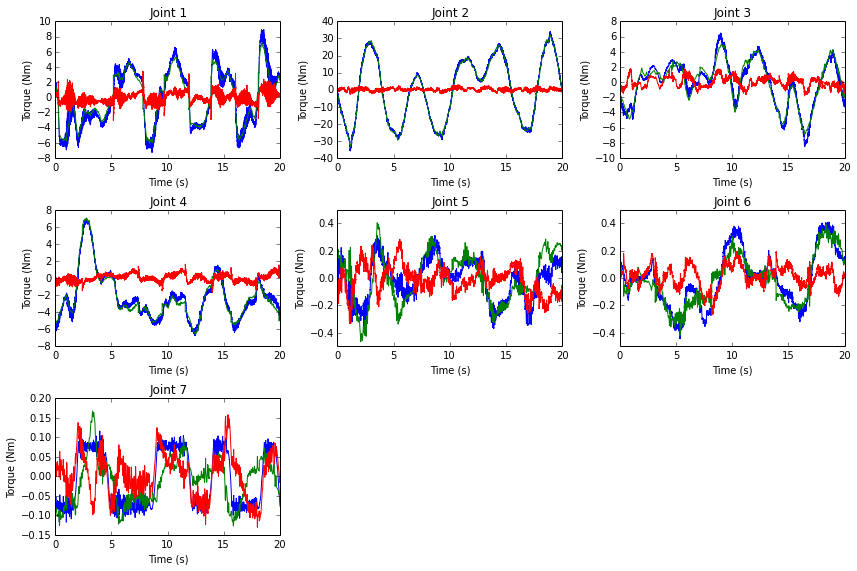

In [310]:
from matplotlib import pyplot as plt
plt.close()

plt.figure(figsize=(12,8))

axes = []
for i in range(tau.shape[1]):
    ax = plt.subplot(3, 3, i+1)
    ax.plot(t[:firsts],tau_raw[:,i][:firsts], label="Measured torque")
    ax.plot(t[:firsts],tau_pred[:,i][:firsts], label="Estimated torque")
    ax.plot(t[:firsts],err_pred[:,i][:firsts], label="Error")
    ax.set_title( "Joint %d"%(i+1) )
    plt.xlabel("Time (s)")
    plt.ylabel("Torque (Nm)")
    axes.append(ax)

plt.tight_layout()

plt.show()

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

### (generate readme and notebook preview)

In [3]:
def save_files(): 
    from IPython.display import display, Javascript
    Javascript('IPython.notebook.save_notebook()')
    
    import json
    with open('WAM7 Dynamic Parameter Identification.ipynb', 'r') as f:
        d = json.load(f)
    with open('README.md', 'w') as f:
        f.write(''.join(d['worksheets'][0]['cells'][0]['source']).encode('UTF-8'))
    
    !ipython nbconvert "WAM7 Dynamic Parameter Identification.ipynb" --to html

In [3]:
#save_files()

In [36]:
#!git status

In [37]:
#!git commit -a -m "Add automathic README.md file generator"

In [38]:
#!git push